# Assignment

## Story:

As a data analyst, you have been given a task to monitor and report US domestic airline flights performance. Goal is to analyze the performance of the reporting airline to improve fight reliability thereby improving customer relaibility.

Below are the key report items,

-   Yearly airline performance report 
-   Yearly average flight delay statistics

_NOTE:_ Year range is between 2005 and 2020.

## Components of the report items

1.  Yearly airline performance report 

    For the chosen year provide,

    -   Number of flights under different cancellation categories using bar chart.
    -   Average flight time by reporting airline using line chart.
    -   Percentage of diverted airport landings per reporting airline using pie chart.
    -   Number of flights flying from each state using choropleth map.
    -   Number of flights flying to each state from each reporting airline using treemap chart.
2.  Yearly average flight delay statistics

    For the chosen year provide,

    -   Monthly average carrier delay by reporting airline for the given year.
    -   Monthly average weather delay by reporting airline for the given year.
    -   Monthly average natioanl air system delay by reporting airline for the given year.
    -   Monthly average security delay by reporting airline for the given year.
    -   Monthly average late aircraft delay by reporting airline for the given year.

## Application

In [124]:
# Import required libraries
import pandas as pd
import dash
import dash_html_components as html
import dash_core_components as dcc
from dash.dependencies import Input, Output, State
from jupyter_dash import JupyterDash
import plotly.graph_objects as go
import plotly.express as px

In [125]:
import plotly
print(plotly.__version__)

4.14.3


In [126]:
# Create a dash application
app = JupyterDash(__name__)

In [128]:
JupyterDash.infer_jupyter_proxy_config()

In [130]:
JupyterDash.infer_jupyter_proxy_config() # run code twice because there is a bug

In [131]:
# REVIEW1: Clear the layout and do not display exception till callback gets executed
app.config.suppress_callback_exceptions = True

In [132]:
# Read the airline data into pandas dataframe
airline_data =  pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/airline_data.csv', 
                            encoding = "ISO-8859-1",
                            dtype={'Div1Airport': str, 'Div1TailNum': str, 
                                   'Div2Airport': str, 'Div2TailNum': str})

In [133]:
# List of years 
year_list = [i for i in range(2005, 2021, 1)]

In [134]:
def compute_data_choice_1(df):
    # Cancellation Category Count
    bar_data = df.groupby(['Month','CancellationCode'])['Flights'].sum().reset_index()
    # Average flight time by reporting airline
    line_data = df.groupby(['Month','Reporting_Airline'])['AirTime'].mean().reset_index()
    # Diverted Airport Landings
    div_data = df[df['DivAirportLandings'] != 0.0]
    # Source state count
    map_data = df.groupby(['OriginState'])['Flights'].sum().reset_index()
    # Destination state count
    tree_data = df.groupby(['DestState', 'Reporting_Airline'])['Flights'].sum().reset_index()
    return bar_data, line_data, div_data, map_data, tree_data

In [135]:
def compute_data_choice_2(df):
    # Compute delay averages
    avg_car = df.groupby(['Month','Reporting_Airline'])['CarrierDelay'].mean().reset_index()
    avg_weather = df.groupby(['Month','Reporting_Airline'])['WeatherDelay'].mean().reset_index()
    avg_NAS = df.groupby(['Month','Reporting_Airline'])['NASDelay'].mean().reset_index()
    avg_sec = df.groupby(['Month','Reporting_Airline'])['SecurityDelay'].mean().reset_index()
    avg_late = df.groupby(['Month','Reporting_Airline'])['LateAircraftDelay'].mean().reset_index()
    return avg_car, avg_weather, avg_NAS, avg_sec, avg_late

In [136]:
# Application layout
app.layout = html.Div(children=[ html.H1('US Domestic Airline Flights Performance',
                                style={'textAlign': 'center', 'color': '#503D36',
                                'font-size': 24}),   # TODO1: Add title to the dashboard
                                
                                # Add an division
                                    html.Div([
                                        # Create an division for adding dropdown helper text for report type
                                        html.Div(
                                            [
                                            html.H2('Report Type:', style={'margin-right': '2em'}),
                                            ]
                                        ),
                                        # TODO2: Add a dropdown    
                                          dcc.Dropdown(
                                              id='input-type', 
                                              options=[
                                                 {'label': 'Yearly Airline Performance Report', 'value': 'OPT1'},
                                                 {'label': 'Yearly Airline Delay Report', 'value': 'OPT2'}
                                             ],
                                             placeholder='Select',
                                             style={'width':'80%', 'padding':'3px', 'font-size': '20px', 'text-align-last' : 'center'}), 
                                       # Place them next to each other using the division style
                                    ], style={'display':'flex'}),
                                    
                                   # Add next division 
                                   html.Div([
                                       # Create an division for adding dropdown helper text for choosing year
                                        html.Div(
                                            [
                                            html.H2('Choose Year:', style={'margin-right': '2em'})
                                            ]
                                        ),
                                        dcc.Dropdown(id='input-year', 
                                                     # Update dropdown values using list comphrehension
                                                     options=[{'label': i, 'value': i} for i in year_list],
                                                     placeholder="Select a year",
                                                     style={'width':'80%', 'padding':'3px', 'font-size': '20px', 'text-align-last' : 'center'}),
                                            # Place them next to each other using the division style
                                            ], style={'display': 'flex'}),  
                                                                          
                                # Add Computed graphs
                                # REVIEW3: Observe how we add an empty division and providing an id that will be updated during callback
                                html.Div([ ], id='plot1'),
    
                                html.Div([
                                        html.Div([ ], id='plot2'),
                                        html.Div([ ], id='plot3')
                                ], style={'display': 'flex'}),
                                
                                # TODO3: Add a division with two empty divisions inside. See above disvision for example.
                                html.Div([
                                        html.Div([ ], id='plot4'),
                                        html.Div([ ], id='plot5')
                                ], style={'display': 'flex'}),
                                ])

In [137]:
# Callback function definition
# TODO4: Add 5 ouput components
@app.callback( [Output(component_id='plot1', component_property='children'),
                Output(component_id='plot2', component_property='children'),
                Output(component_id='plot3', component_property='children'),
                Output(component_id='plot4', component_property='children'),
                Output(component_id='plot5', component_property='children')
               ],
               [Input(component_id='input-type', component_property='value'),
                Input(component_id='input-year', component_property='value')],
               # REVIEW4: Holding output state till user enters all the form information. In this case, it will be chart type and year
               [State("plot1", 'children'), State("plot2", "children"),
                State("plot3", "children"), State("plot4", "children"),
                State("plot5", "children")
               ])

# Add computation to callback function and return graph
def get_graph(chart, year, children1, children2, c3, c4, c5):
      
        # Select data
        df =  airline_data[airline_data['Year']==int(year)]
       
        if chart == 'OPT1':
            # Compute required information for creating graph from the data
            bar_data, line_data, div_data, map_data, tree_data = compute_data_choice_1(df)
            
            # Number of flights under different cancellation categories
            bar_fig = px.bar(bar_data, x='Month', y='Flights', color='CancellationCode', title='Monthly Flight Cancellation')
            
            # TODO5: Average flight time by reporting airline
            line_fig = px.line(line_data, x='Month', y='AirTime', color='Reporting_Airline', title='Average monthly flight time (minutes) by airline')
            
            # Percentage of diverted airport landings per reporting airline
            pie_fig = px.pie(div_data, values='Flights', names='Reporting_Airline', title='% of flights by reporting airline')
            
            # REVIEW5: Number of flights flying from each state using choropleth
            map_fig = px.choropleth(map_data,  # Input data
                    locations='OriginState', 
                    color='Flights',  
                    hover_data=['OriginState', 'Flights'], 
                    locationmode = 'USA-states', # Set to plot as US States
                    color_continuous_scale='GnBu',
                    range_color=[0, map_data['Flights'].max()]) 
            map_fig.update_layout(
                    title_text = 'Number of flights from origin state', 
                    geo_scope='usa') # Plot only the USA instead of globe
            
            # TODO6: Number of flights flying to each state from each reporting airline
            tree_fig = px.treemap(tree_data2, path=['DestState', 'Reporting_Airline'], 
                    values='Flights',
                    color= 'Flights',
                    color_continuous_scale='RdBu',
                    title='Flight count by airline to destination state')
                               
            # REVIEW6: Return dcc.Graph component to the empty division
            return [dcc.Graph(figure=tree_fig), 
                    dcc.Graph(figure=pie_fig),
                    dcc.Graph(figure=map_fig),
                    dcc.Graph(figure=bar_fig),
                    dcc.Graph(figure=line_fig)
                   ]
        
        else:
            # REVIEW7: This covers chart type 2 and we have completed this exercise under Flight Delay Time Statistics Dashboard section
            # Compute required information for creating graph from the data
            avg_car, avg_weather, avg_NAS, avg_sec, avg_late = compute_data_choice_2(df)
            
            # Create graph
            carrier_fig = px.line(avg_car, x='Month', y='CarrierDelay', color='Reporting_Airline', title='Average carrrier delay time (minutes) by airline')
            weather_fig = px.line(avg_weather, x='Month', y='WeatherDelay', color='Reporting_Airline', title='Average weather delay time (minutes) by airline')
            nas_fig = px.line(avg_NAS, x='Month', y='NASDelay', color='Reporting_Airline', title='Average NAS delay time (minutes) by airline')
            sec_fig = px.line(avg_sec, x='Month', y='SecurityDelay', color='Reporting_Airline', title='Average security delay time (minutes) by airline')
            late_fig = px.line(avg_late, x='Month', y='LateAircraftDelay', color='Reporting_Airline', title='Average late aircraft delay time (minutes) by airline')
            
            return[dcc.Graph(figure=carrier_fig), 
                   dcc.Graph(figure=weather_fig), 
                   dcc.Graph(figure=nas_fig), 
                   dcc.Graph(figure=sec_fig), 
                   dcc.Graph(figure=late_fig)]

In [138]:
# Run the app
if __name__ == '__main__':
    # REVIEW8: Adding dev_tools_ui=False, dev_tools_props_check=False can prevent error appearing before calling callback function
    #app.run_server(mode="inline", host="localhost", debug=False, dev_tools_ui=False, dev_tools_props_check=False)
    app.run_server(port=8000, debug=False)

127.0.0.1 - - [29/Apr/2021 11:36:54] "GET /_shutdown_b77d0f4f-b2d2-44e3-a662-02394a13915a HTTP/1.1" 200 -
 * Running on http://127.0.0.1:8000/ (Press CTRL+C to quit)
127.0.0.1 - - [29/Apr/2021 11:36:54] "GET /_alive_b77d0f4f-b2d2-44e3-a662-02394a13915a HTTP/1.1" 200 -


Dash app running on http://localhost:8844/proxy/8000/


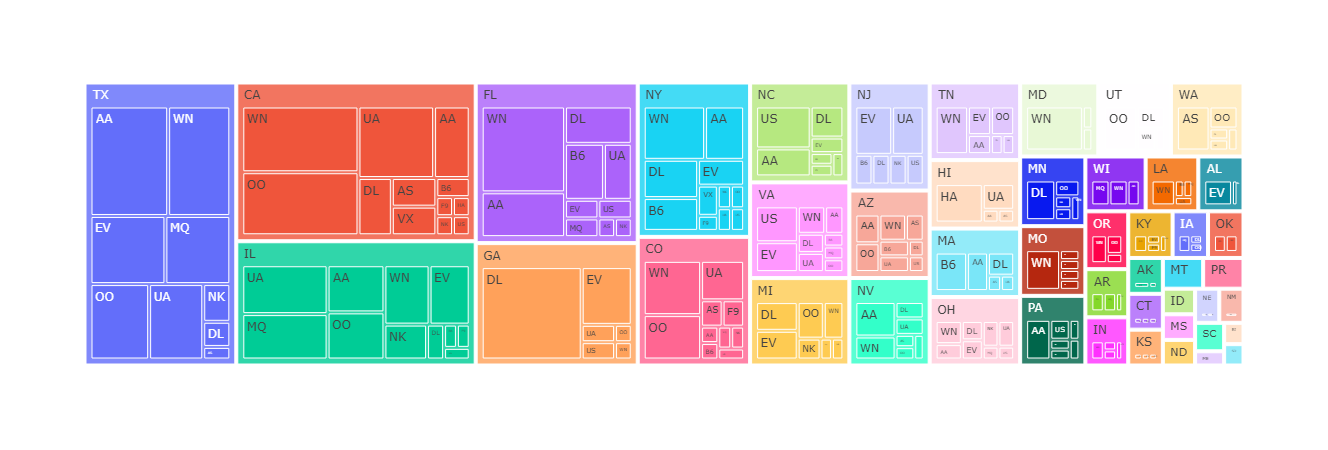

In [139]:
# the plotly express treemap does not go to the dashboard (plotly bug) so i have displayed it here instead
df =  airline_data[airline_data['Year']==int(2015)]
tree_data2 = df.groupby(['DestState', 'Reporting_Airline'])['Flights'].sum().reset_index()
fig = px.treemap(tree_data2, path=['DestState', 'Reporting_Airline'], values= 'Flights')
fig.show()